# Gemini API: Prompting Quickstart with REST

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


If you want to quickly try out the Gemini API, you can use `curl` commands to call the methods in the REST API.

This notebook contains `curl` commands you can run in Google Colab, or copy to your terminal.

To run this notebook, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you are running in a different environment, you can store your key in an environment variable. See [Authentication](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Authentication.ipynb) to learn more.

In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

## Gemini and `Content` based APIs

### Text-only input

Use the `generateContent` method to generate a response from the model given an input message. If the input contains only text, use the `gemini-pro` model.

In [1]:
%%bash

curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{
          "text": "Write a story about a magic backpack."}]}]}' 2> /dev/null

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "In the quaint little town of Willow Creek, resided an ordinary schoolgirl named Emily. Her life took an extraordinary turn one fateful afternoon when she stumbled upon an unassuming backpack hidden amidst the dusty shelves of an antique shop.\n\nAs Emily reached for the backpack, a faint shimmer caught her eye. Curiosity compelled her to open it, revealing an array of compartments adorned with intricate runes. To her astonishment, as she touched each rune, it emitted a soft glow and whispered secrets in an ancient tongue.\n\nEmily soon discovered that this was no ordinary backpack. It possessed the power to grant wishes, but with a caveat: each wish came at a price. At first, Emily used the backpack sparingly, fulfilling her childhood dreams—a new doll, a beautiful dress. But as her desires grew, so too did the consequences.\n\nOne day, she wished for endless knowledge, only to find herself

### Text-and-image input

If the input contains both text and image, use the `gemini-pro-vision` model. The following snippets help you build a request and send it to the REST API.

In [33]:
%%bash
curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/images/scones.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  385k  100  385k    0     0  1978k      0 --:--:-- --:--:-- --:--:-- 1986k


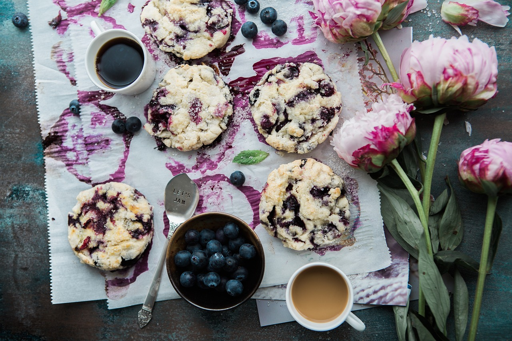

In [3]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img.resize((512, int(img.height*512/img.width)))

In [26]:
%%bash

curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?key=${GOOGLE_API_KEY} \
        -H 'Content-Type: application/json' \
        -d '{
  "contents":[
    {
      "parts":[
        {"text": "What is this picture?"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -i image.jpg)'"
          }
        }
      ]
    }
  ]
}'   2> /dev/null  | grep -C 5 "text"

  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": " The picture shows a table with a white tablecloth. On the table are two cups of coffee, a bowl of blueberries, a silver spoon, and five scones. There are also some pink flowers on the table."
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",


### Multi-turn conversations (chat)

Using Gemini, you can build freeform conversations across multiple turns.

In [27]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{ 
      "contents": [ 
        {"role":"user", 
         "parts":[{ 
           "text": "Write the first line of a story about a magic backpack."}]}, 
        {"role": "model", 
         "parts":[{ 
           "text": "In the bustling city of Meadow brook, lived a young girl named Sophie. She was a bright and curious soul with an imaginative mind."}]}, 
        {"role": "user", 
         "parts":[{ 
           "text": "Can you set it in a quiet village in 1600s France?"}]}, 
      ]
    }' 2> /dev/null | grep -C 5 "text"

  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "Nestled amidst the rolling hills and whispering willows of the tranquil village of Verchant in 1600s France, resided a young maiden named Antoinette.\n\nOne fateful morn, as Antoinette skipped through the sun-kissed meadows, a peculiar sight met her curious gaze. Lying abandoned beneath an ancient oak tree was a satchel of weathered leather, its buckles glinting in the sunlight."
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",


**Note**: The `gemini-pro-vision model` (for text-and-image input) is not yet optimized for multi-turn conversations. Make sure to use `gemini-pro` and text-only input for chat use cases.

### Configuration

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. Learn more about [model parameters](https://ai.google.dev/docs/concepts#model_parameters).

Also, you can use safety settings to adjust the likelihood of getting responses that may be considered harmful. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [safety settings](https://ai.google.dev/docs/concepts#model_parameters).

The following example specifies values for all the parameters of the generateContent method.

In [28]:
%%bash 

curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "contents": [{
            "parts":[
                {"text": "Write a story about a magic backpack."}
            ]
        }],
        "safetySettings": [
            {
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
                "threshold": "BLOCK_ONLY_HIGH"
            }
        ],
        "generationConfig": {
            "stopSequences": [
                "Title"
            ],
            "temperature": 1.0,
            "maxOutputTokens": 800,
            "topP": 0.8,
            "topK": 10
        }
    }'  2> /dev/null | grep "text"

            "text": "In the quaint town of Willow Creek, nestled amidst rolling hills and whispering willows, resided an extraordinary young girl named Anya. Known for her unyielding curiosity and adventurous spirit, Anya possessed a secret that set her apart from her peers—a magical backpack.\n\nCrafted from shimmering emerald silk, the backpack shimmered with an ethereal glow. It was a gift from her eccentric grandmother, a renowned sorceress who had passed down the family's most cherished artifacts. As Anya unzipped the backpack, a kaleidoscope of colors danced before her eyes, revealing its extraordinary contents.\n\nWithin the first compartment lay a Book of Spells, its pages filled with ancient incantations and forgotten knowledge. Anya's heart skipped a beat as she realized the potential at her fingertips. The second compartment housed a Wand of Light, its ivory handle glowing with celestial energy. It could illuminate the darkest of nights and banish evil spirits with a mere fl

### Count Tokens

When using long prompts, it might be useful to count tokens before sending any content to the model.

In [32]:
%%bash

curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:countTokens?key=$GOOGLE_API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{
          "text": "Write a story about a magic backpack."}]}]}'  2> /dev/null

{
  "totalTokens": 8
}
